In [11]:
import pandas as pd
train_df = pd.read_csv("C:/Users/ajaym/Downloads/train.csv")
test_df = pd.read_csv("C:/Users/ajaym/Downloads/test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Cabin'] = train_df['Cabin'].fillna('U')

C:\Users\ajaym\AppData\Local\Temp\ipykernel_21140\622261402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)


In [14]:

train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [15]:
train_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()
#test_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


(0.0, 11.0)

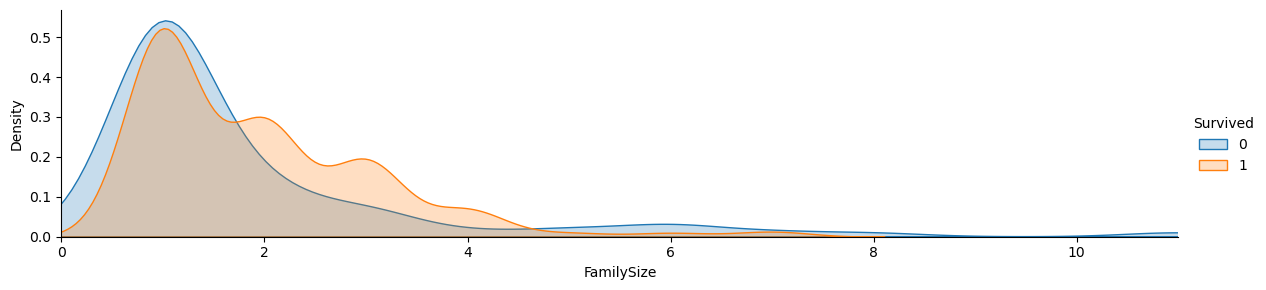

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train_df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [17]:
train_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [18]:

train_df ['Fam_type'] = pd.cut(train_df.FamilySize, [0,2,5,7,11], labels=['Solo', 'Small', 'Big','Very big']) 

In [19]:
train_df.groupby(['Fam_type'], as_index=False)['Survived'].mean()

C:\Users\ajaym\AppData\Local\Temp\ipykernel_21140\2701968411.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fam_type'], as_index=False)['Survived'].mean()


,Fam_type,Survived
0,Solo,0.361032
1,Small,0.568493
2,Big,0.205882
3,Very big,0.000000


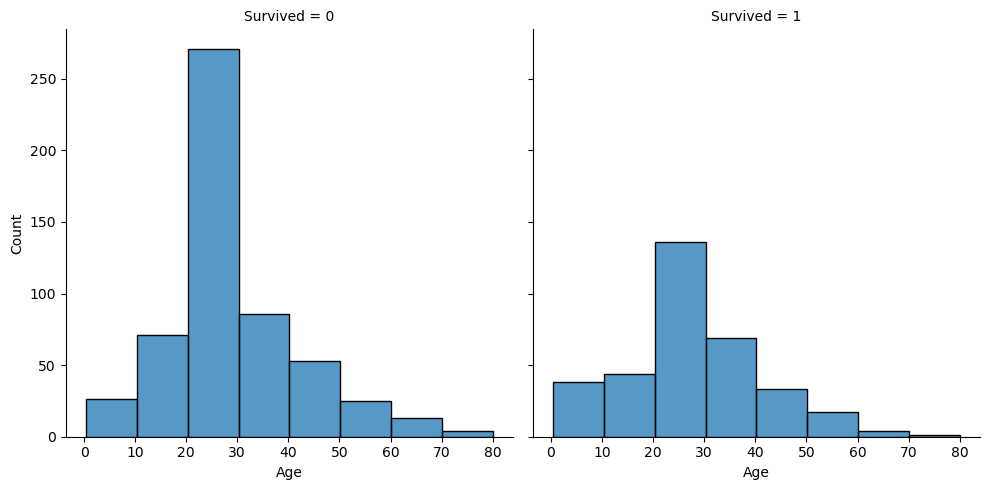

In [20]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [21]:

train_df['Age_Cut'] = pd.qcut(train_df['Age'], 5)

In [22]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\ajaym\AppData\Local\Temp\ipykernel_21140\1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 20.0]",0.458101
1,"(20.0, 28.0]",0.360656
2,"(28.0, 29.699]",0.301508
3,"(29.699, 38.0]",0.444444
4,"(38.0, 80.0]",0.372881


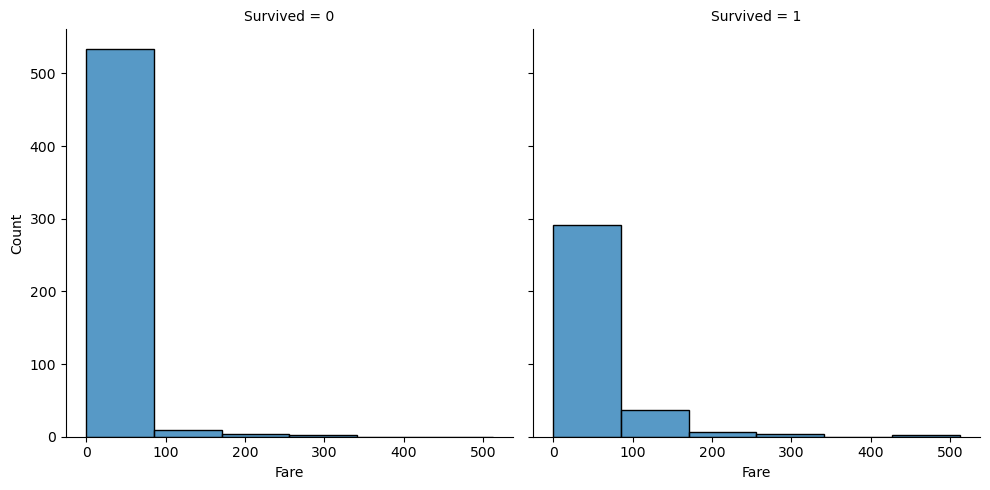

In [23]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [24]:

train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 5)
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\ajaym\AppData\Local\Temp\ipykernel_21140\1048486047.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [25]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:

train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [27]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [28]:
train_df['Title'] = train_df['Title'].replace(['Capt', 'Rev', 'Jonkheer','Don','Mr'], 'one')
train_df['Title'] = train_df['Title'].replace(['Col', 'Dr', 'Major','Master','Miss'], 'Two')
train_df['Title'] = train_df['Title'].replace(['the Countess', 'Sir', 'Ms','Mrs','Mme','Mlle','Lady'], 'Three')

In [29]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Three,0.803030
1,Two,0.665236
2,one,0.153992


In [30]:

train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [31]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [32]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [33]:

train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [34]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [35]:

train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

In [36]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [37]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [38]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fam_type,Age_Cut,Fare_Cut,Title,TicketNumber,TicketNumberCounts,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S,2,Solo,"(20.0, 28.0]","(-0.001, 7.854]",one,21171,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,2,Solo,"(29.699, 38.0]","(39.688, 512.329]",Three,17599,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S,1,Solo,"(20.0, 28.0]","(7.854, 10.5]",Two,3101282,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,2,Solo,"(29.699, 38.0]","(39.688, 512.329]",Three,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S,1,Solo,"(29.699, 38.0]","(7.854, 10.5]",one,373450,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,U,S,1,Solo,"(20.0, 28.0]","(10.5, 21.679]",one,211536,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,1,Solo,"(0.419, 20.0]","(21.679, 39.688]",Two,112053,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,U,S,4,Small,"(28.0, 29.699]","(21.679, 39.688]",Two,6607,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,1,Solo,"(20.0, 28.0]","(21.679, 39.688]",one,111369,1,1


In [39]:

from sklearn.preprocessing import LabelEncoder
train_df["Fam_type"] = LabelEncoder().fit_transform(train_df["Fam_type"])

train_df["Ticket"] = LabelEncoder().fit_transform(train_df["Ticket"])
train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"])
train_df["Sex"] = LabelEncoder().fit_transform(train_df["Sex"])
train_df["Name"] = LabelEncoder().fit_transform(train_df["Name"])
train_df["Title"] = LabelEncoder().fit_transform(train_df["Title"])
train_df["Age_Cut"] = LabelEncoder().fit_transform(train_df["Age_Cut"])
train_df["Fare_Cut"] = LabelEncoder().fit_transform(train_df["Fare_Cut"])

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    int32  
 4   Sex                 891 non-null    int32  
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    int32  
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            891 non-null    int32  
 12  FamilySize          891 non-null    int64  
 13  Fam_type            891 non-null    int32  
 14  Age_Cut             891 non-null    int32  
 15  Fare_Cut            891 non-null    int32  
 16  Title   

In [41]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Fam_type', 'Age_Cut', 'Fare_Cut', 'Title', 'TicketNumber',
       'TicketNumberCounts', 'Cabin_Assigned'],
      dtype='object')

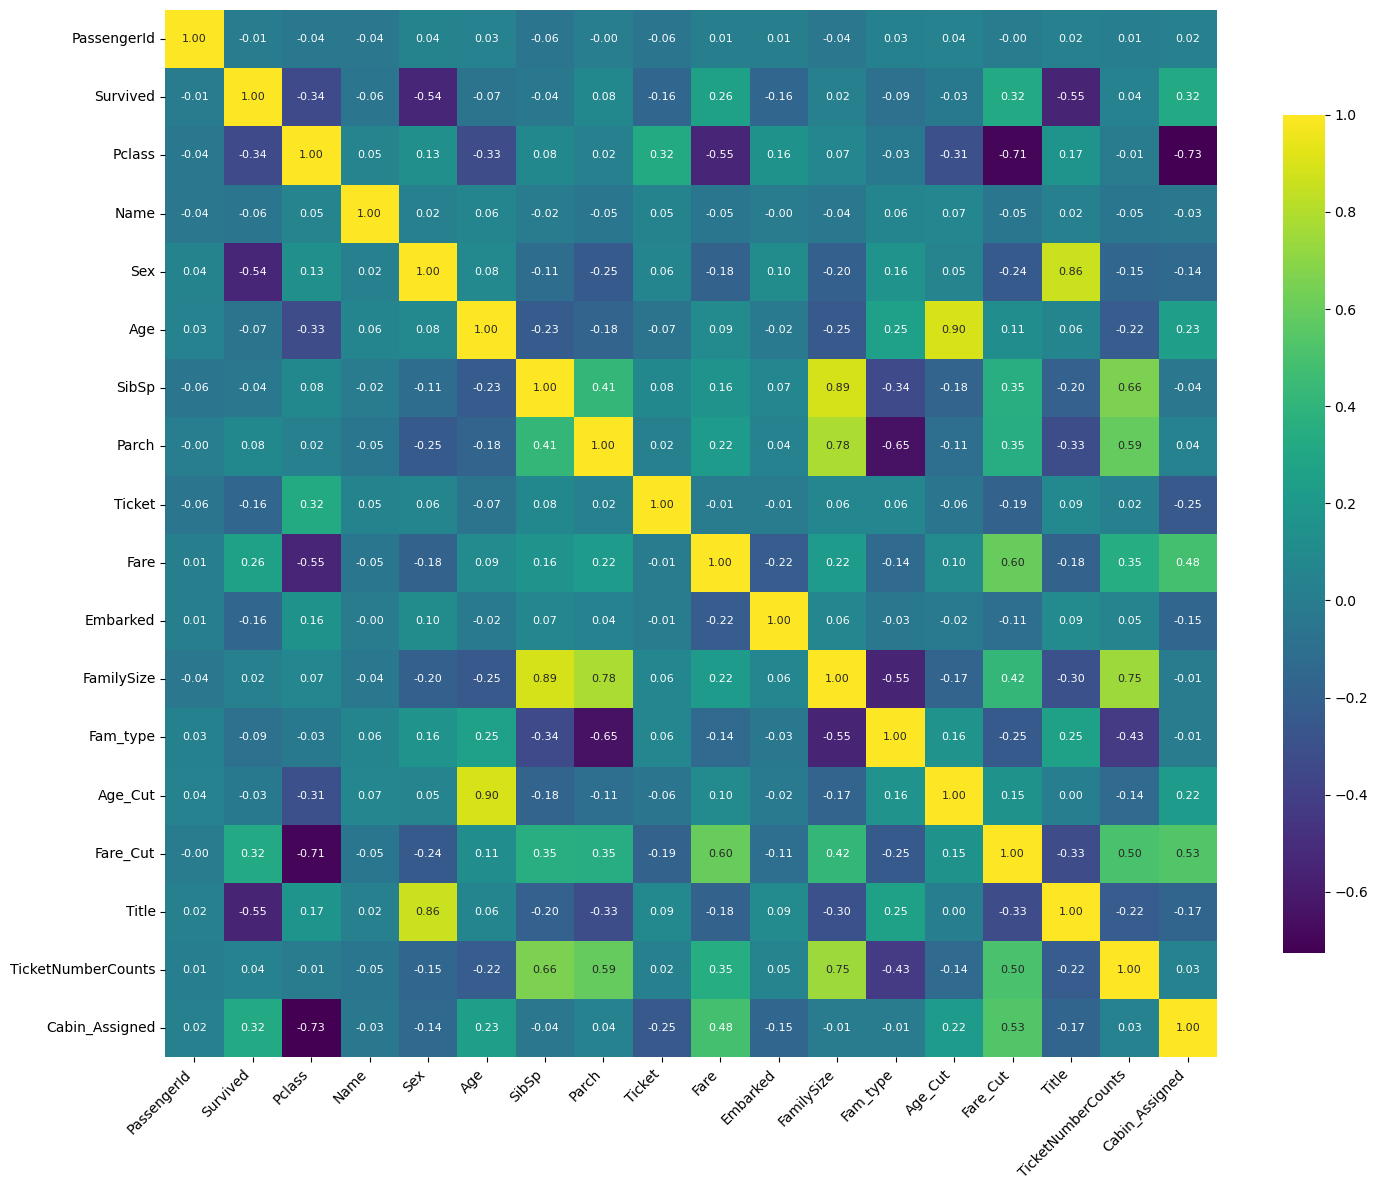

In [42]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

# Adjust the figure size and font properties for better readability
plt.figure(figsize=(15, 12))  # Increase figure size
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='viridis', 
                      fmt=".2f", 
                      annot_kws={"size": 8},  # Smaller font size for annotations
                      cbar_kws={"shrink": 0.8})  # Shrink color bar size

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [43]:

train_df = train_df.loc[:,['Survived','Pclass', 'Sex', 'Fare_Cut', 'Title', 'Embarked', 'Fam_type', 'TicketNumberCounts']]
train_df

,Survived,Pclass,Sex,Fare_Cut,Title,Embarked,Fam_type,TicketNumberCounts
0,0,3,1,0,2,2,2,1
1,1,1,0,4,0,0,2,1
2,1,3,0,1,1,2,2,1
3,1,1,0,4,0,2,2,2
4,0,3,1,1,2,2,2,1
...,...,...,...,...,...,...,...,...
886,0,2,1,2,2,2,2,1
887,1,1,0,3,1,2,2,1
888,0,3,0,3,1,2,1,2
889,1,1,1,3,2,0,2,1


In [44]:
X = train_df.iloc[:,1:].values 
y = train_df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0 )

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 10, n_estimators= 200)

rf_model = rfc.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

from sklearn.metrics import classification_report  #fare and removed
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.85      0.75      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from itertools import combinations

# Define your feature columns
feature_columns = ['Pclass', 'Sex','Age_Cut','Fare_Cut','Title'  ,'Embarked','Fam_type','TicketNumberCounts', 'Cabin_Assigned']

# Initialize variables to keep track of the best score and corresponding features
best_accuracy = 0
best_features = None

# Loop through all combinations of feature columns
for i in range(1, len(feature_columns) + 1):
    for combo in combinations(feature_columns, i):
        # Create final DataFrame with the current combination of features
        df_clean = train_df.loc[:, ["Survived"] + list(combo)]
        
        # Define X and y
        X = df_clean.iloc[:, 1:].values 
        y = df_clean.iloc[:, 0].values
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        
        # Fit the model
        rfc = RandomForestClassifier()
        rf_model = rfc.fit(X_train, y_train)
        
        # Make predictions
        y_pred = rf_model.predict(X_test)
        
        # Calculate accuracy
        accuracy = (y_pred == y_test).mean()
        
        # Update best accuracy and features if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = combo

# Print the best accuracy and corresponding features
print("Best Accuracy:", best_accuracy)
print("Best Feature Combination:", best_features)


KeyError: "['Age_Cut'] not in index"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid (deep grid search)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],               # Number of trees
    'max_depth': [None, 10, 20, 30, 40],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                           # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],                # Number of features considered for best split
    'bootstrap': [True, False],                              # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy'],                        # Quality of split
}

# Initialize GridSearchCV with RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rfc_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rfc_model.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 10, n_estimators= 200)

rf_model = rfc.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

from sklearn.metrics import classification_report  #fare and removed
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score

models = {'LogisticReg':LogisticRegression()
         ,'DecisionTree':DecisionTreeClassifier()
         ,'RandForest':RandomForestClassifier()
         ,'SVC':SVC()
         ,'GaussianNaiveBayes':GaussianNB()
         ,'KNN':KNeighborsClassifier()
         ,'GradientBoost':GradientBoostingClassifier()}

# Create an empty dictionary to store the results
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Loop through each model, train, predict, and collect the metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the test set
    
    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    
    # Append the results to the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by accuracy for better visibility
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame in a clear tabular format
metrics_df

In [249]:
import pandas as pd
test_data = pd.read_csv("C:/Users/ajaym/Downloads/test.csv")
test_data 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [250]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df ['Fam_type'] = pd.cut(test_df.FamilySize, [0,2,5,7,11], labels=['Solo', 'Small', 'Big','Very big']) 
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 5)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 5)
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])
from sklearn.preprocessing import LabelEncoder
test_df["Fam_type"] = LabelEncoder().fit_transform(test_df["Fam_type"])
test_df["Ticket"] = LabelEncoder().fit_transform(test_df["Ticket"])
test_df["Embarked"] = LabelEncoder().fit_transform(test_df["Embarked"])
test_df["Sex"] = LabelEncoder().fit_transform(test_df["Sex"])
test_df["Name"] = LabelEncoder().fit_transform(test_df["Name"])
test_df["Title"] = LabelEncoder().fit_transform(test_df["Title"])
test_df["Age_Cut"] = LabelEncoder().fit_transform(test_df["Age_Cut"])
test_df["Fare_Cut"] = LabelEncoder().fit_transform(test_df["Fare_Cut"])
test_df.Fare = test_df.Fare.astype(float)
test_df = test_df.loc[:,['Pclass', 'Sex', 'Fare_Cut', 'Title', 'Embarked', 'Fam_type', 'TicketNumberCounts']]
test_df

C:\Users\ajaym\AppData\Local\Temp\ipykernel_15588\2115879943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


,Pclass,Sex,Fare_Cut,Title,Embarked,Fam_type,TicketNumberCounts
0,3,1,1,5,1,2,1
1,3,0,0,6,2,2,1
2,2,1,1,5,1,2,1
3,3,1,1,5,2,2,1
4,3,0,2,6,2,1,1
...,...,...,...,...,...,...,...
413,3,1,1,5,2,2,1
414,1,0,4,1,0,2,1
415,3,1,0,5,2,2,1
416,3,1,1,5,2,2,1


In [251]:
y_pred = rf_model.predict(test_df)

test_data = pd.read_csv("C:/Users/ajaym/Downloads/test.csv")
a = test_data.iloc[:,0].values
dict = {'PassengerId': a, 'Survived': y_pred}

df1 = pd.DataFrame(dict)
# Save the DataFrame to a CSV file
df1.to_csv('output1.csv',index=False)

C:\Users\ajaym\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score

models = {'LogisticReg':LogisticRegression()
         ,'DecisionTree':DecisionTreeClassifier()
         ,'RandForest':RandomForestClassifier()
         ,'SVC':SVC()
         ,'GaussianNaiveBayes':GaussianNB()
         ,'KNN':KNeighborsClassifier()
         ,'GradientBoost':GradientBoostingClassifier()}

# Create an empty dictionary to store the results
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Loop through each model, train, predict, and collect the metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the test set
    
    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    
    # Append the results to the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by accuracy for better visibility
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame in a clear tabular format
metrics_df

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import pandas as pd

# Define the models
models = {
    'LogisticReg': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandForest': RandomForestClassifier(),
    'SVC': SVC(),
    'GaussianNaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'GradientBoost': GradientBoostingClassifier()
}

# Define the parameter grids for GridSearchCV
param_grids = {
    'LogisticReg': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]},
    'RandForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'GradientBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05]},
    # Naive Bayes doesn't need a parameter grid, so it's excluded from GridSearch
}

# Create an empty dictionary to store the results
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Best Params': []
}

# Loop through each model
for model_name, model in models.items():
    
    # Check if the model has a parameter grid for GridSearch
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_  # Get the best model
        best_params = grid_search.best_params_    # Get the best hyperparameters
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = 'N/A'  # Naive Bayes has no parameters to tune

    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multiclass problems
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append the results to the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['Best Params'].append(best_params)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by accuracy for better visibility
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame
metrics_df


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the data
train_df = pd.read_csv('C:/Users/ajaym/Downloads/train.csv')

# Step 2: Handle missing values
# Fill missing Age values by using median age of passengers based on their Sex and Pclass
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing Embarked values with the mode (most frequent value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
train_df.drop(columns=['Cabin'], inplace=True)

# Step 3: Feature Engineering - Extract Title from Name
train_df['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplify Title to common categories
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master', 
    'Dr': 'Officer', 'Rev': 'Officer', 'Col': 'Officer', 'Major': 'Officer',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Capt': 'Officer', 'Sir': 'Royalty',
    'Lady': 'Royalty', 'Countess': 'Royalty', 'Jonkheer': 'Royalty', 'Don': 'Royalty'
}
train_df['Title'] = train_df['Title'].map(title_mapping)

# Step 4: Convert Categorical Variables to Numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns (Name, Ticket, PassengerId)
train_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Step 5: Split the data into features (X) and target (y)
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0 )

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 10, n_estimators= 200)

rf_model = rfc.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

from sklearn.metrics import classification_report  #fare and removed
print(classification_report(y_test,y_pred))

C:\Users\ajaym\AppData\Local\Temp\ipykernel_12260\1979170311.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [18]:
# Step 1: Load the data
test_df = pd.read_csv('C:/Users/ajaym/Downloads/train.csv')

# Step 2: Handle missing values
# Fill missing Age values by using median age of passengers based on their Sex and Pclass
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing Embarked values with the mode (most frequent value)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
test_df.drop(columns=['Cabin'], inplace=True)

# Step 3: Feature Engineering - Extract Title from Name
test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Simplify Title to common categories
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master', 
    'Dr': 'Officer', 'Rev': 'Officer', 'Col': 'Officer', 'Major': 'Officer',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Capt': 'Officer', 'Sir': 'Royalty',
    'Lady': 'Royalty', 'Countess': 'Royalty', 'Jonkheer': 'Royalty', 'Don': 'Royalty'
}
test_df['Title'] = test_df['Title'].map(title_mapping)

# Step 4: Convert Categorical Variables to Numeric
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
# test_df = pd.get_dummies(test_df, columns=['Pclass', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns (Name, Ticket, PassengerId)
test_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Step 5: Split the data into features (X) and target (y)
test_df = train_df.drop(columns=['Survived'])

C:\Users\ajaym\AppData\Local\Temp\ipykernel_12260\130456817.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


ValueError: could not convert string to float: 'S'

In [19]:
y_pred = rf_model.predict(test_df)

test_data = pd.read_csv("C:/Users/ajaym/Downloads/test.csv")
a = test_data.iloc[:,0].values
dict = {'PassengerId': a, 'Survived': y_pred}

df1 = pd.DataFrame(dict)
# Save the DataFrame to a CSV file
df1.to_csv('chatgpt.csv',index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Embarked
- Pclass
- Survived
- Title
Feature names seen at fit time, yet now missing:
- Embarked_Q
- Embarked_S
- Pclass_2
- Pclass_3
- Title_Miss
- ...
